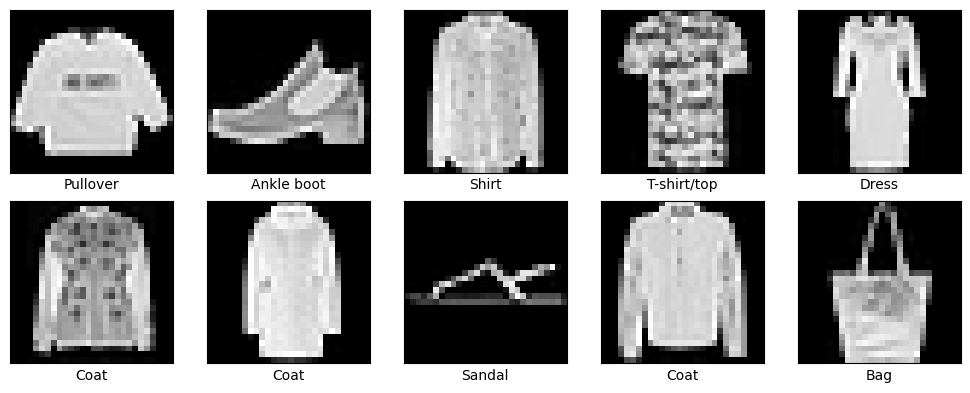

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-04 04:50:08.472394: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/15
844/844 - 5s - 6ms/step - accuracy: 0.7849 - loss: 0.6009 - val_accuracy: 0.8432 - val_loss: 0.4265
Epoch 2/15
844/844 - 3s - 4ms/step - accuracy: 0.8412 - loss: 0.4388 - val_accuracy: 0.8623 - val_loss: 0.3813
Epoch 3/15
844/844 - 3s - 4ms/step - accuracy: 0.8555 - loss: 0.3997 - val_accuracy: 0.8682 - val_loss: 0.3726
Epoch 4/15
844/844 - 3s - 4ms/step - accuracy: 0.8599 - loss: 0.3817 - val_accuracy: 0.8757 - val_loss: 0.3488
Epoch 5/15
844/844 - 3s - 4ms/step - accuracy: 0.8685 - loss: 0.3623 - val_accuracy: 0.8748 - val_loss: 0.3462
Epoch 6/15
844/844 - 3s - 4ms/step - accuracy: 0.8718 - loss: 0.3514 - val_accuracy: 0.8825 - val_loss: 0.3287
Epoch 7/15
844/844 - 3s - 4ms/step - accuracy: 0.8758 - loss: 0.3354 - val_accuracy: 0.8815 - val_loss: 0.3286
Epoch 8/15
844/844 - 3s - 3ms/step - accuracy: 0.8808 - loss: 0.3274 - val_accuracy: 0.8855 - val_loss: 0.3247
Epoch 9/15
844/844 - 3s - 4ms/step - accuracy: 0.8807 - loss: 0.3229 - val_accuracy: 0.8842 - val_loss: 0.3147
E

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# --------- STEP 1: LOAD DATA FROM CSV FILES ---------

# Replace with your actual file paths
train_df = pd.read_csv("/kaggle/input/pict-lab-dataset/fashion-mnist_train.csv")
test_df = pd.read_csv("/kaggle/input/pict-lab-dataset/fashion-mnist_test.csv")

# Separate features and labels
x_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values

x_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# --------- STEP 2: NORMALIZE PIXEL VALUES ---------
x_train = x_train / 255.0
x_test = x_test / 255.0

# --------- STEP 3: RESHAPE INPUTS (Optional: only for visualization) ---------
# Not required for training, but useful for plotting
x_train_reshaped = x_train.reshape(-1, 28, 28)
x_test_reshaped = x_test.reshape(-1, 28, 28)

# --------- STEP 4: LABEL NAMES ---------
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# --------- STEP 5: VISUALIZE SOME IMAGES ---------
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(x_train_reshaped[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

# --------- STEP 6: BUILD THE MODEL ---------
model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # 10 categories
])

# --------- STEP 7: COMPILE THE MODEL ---------
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# --------- STEP 8: TRAIN THE MODEL ---------
history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                    validation_split=0.1, verbose=2)

# --------- STEP 9: EVALUATE THE MODEL ---------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")

# --------- STEP 10: PREDICTIONS ---------
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)


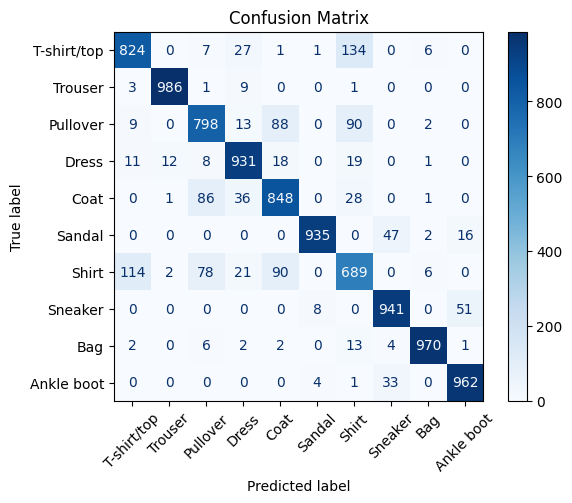

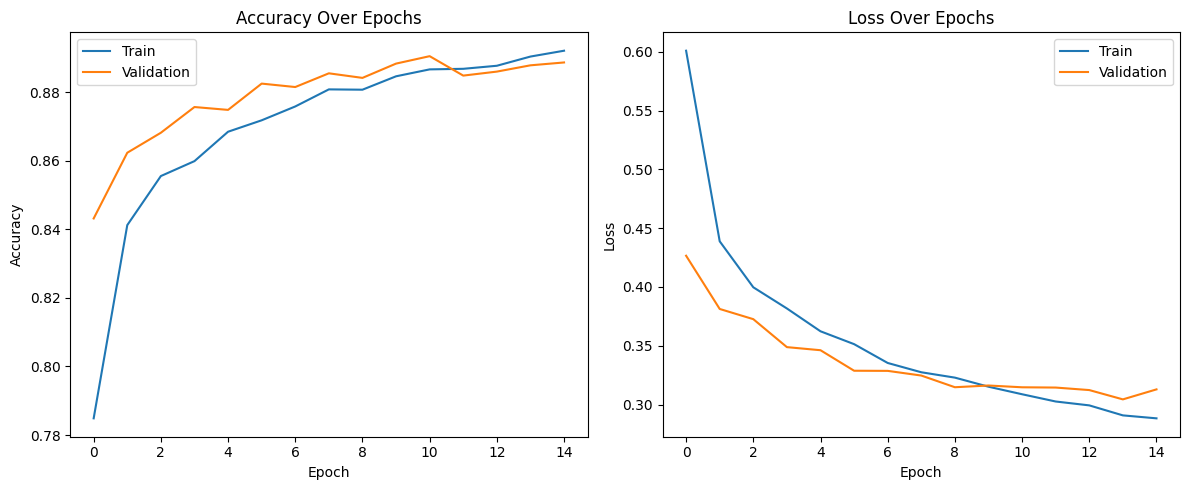

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()

# --------- STEP 12: PLOT ACCURACY AND LOSS ---------
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8884


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.82      0.84      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.81      0.80      0.80      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.81      0.85      0.83      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.71      0.69      0.70      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.98      0.97      0.98      1000
  Ankle boot       0.93      0.96      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize labels for multiclass ROC AUC
y_test_bin = label_binarize(y_test, classes=np.arange(10))
roc_auc = roc_auc_score(y_test_bin, predictions, multi_class='ovr')
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9921
